In [2]:
import pandas as pd
import numpy as np
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.plot import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv('../data/data_train.csv')
X = df.drop(columns=['price_range'])
y = df['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((1120, 20), (280, 20), (1120,), (280,))

In [3]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']),
])

In [4]:
Pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', GaussianNB())
])

In [5]:
Pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['battery_power',
                                                   'clock_speed', 'fc',
                                                   'int_memory', 'm_dep',
                                                   'mobile_wt', 'n_cores', 'pc',
                                                   'px_height', 'px_width',
                                                   'ram', 'sc_h', 'sc_w',
                                                   'talk_time', 'three_g',
                                                   'touch_screen', 'wifi'])])),
                ('algo', GaussianNB())])

In [6]:
Pipeline.score(X_test, y_test)


0.8428571428571429

In [7]:
Pipeline.score(X_train, y_train)

0.8160714285714286

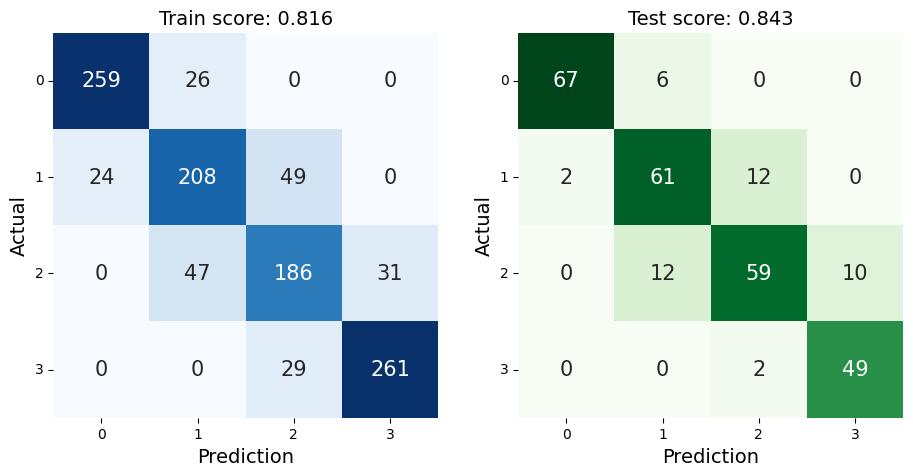

In [8]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, Pipeline)

In [9]:
values = [842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1]

# Membuat DataFrame dari nilai-nilai tersebut
columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt',
           'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen',
           'wifi']

X_pred = pd.DataFrame([values], columns=columns)

# # Menampilkan DataFrame sebelum prediksi
# print("DataFrame Sebelum Prediksi:")
# # print(X_pred)

# Melakukan prediksi menggunakan Pipeline
predicted_price_range = Pipeline.predict(X_pred)

# Menggantikan nilai 'price_range' dengan hasil prediksi
X_pred['price_range'] = predicted_price_range

# Menampilkan DataFrame setelah prediksi
print("\nNilai Price Range Hasil Prediksi:")
print(X_pred["price_range"][0])




Nilai Price Range Hasil Prediksi:
2
